In [4]:
# Import packages needed for analysis of data
import pandas as pd
import plotly.express as px
import re
from matplotlib import pyplot as plt 
import numpy as np 
from scipy import stats 
import seaborn as sns
import streamlit as st 

In [5]:
# Read in the data set
df = pd.read_csv("vehicles_us.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [6]:
# Get an example of the DataFrame, print the first and last 5 rows
print(df.head())
print(df.tail())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
       price  model_year           model  condition  cylinders fuel  odometer  \
51520   9249      2013.0   nissan ma

In [7]:
# Check for missing values
print(df.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [8]:
# Check for duplicates in model
print(df['model'].duplicated().sum())

51425


In [9]:
# See if we can't fill in any information missing in the 'cylinders' column by using the duplicates grouped by the 'model' and 'model_year' column
df['cylinders'] = (
    df.groupby(['model', 'model_year'])['cylinders']
      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
)

In [10]:
# Review how many missing values are now in the cylinders column
print(df['cylinders'].isna().sum())

3645


By using information from duplicates that were grouped by the columns 'model' and 'model_year' we were able to decrease missing values for the 'cylinders' column from a total of 5,260 to 3,645, a difference of 1,615. This will help provide for better calculations and overall data collection.

In [11]:
# By using the newly filled data, we will try and fill in missing data for the column 'is_4wd'
df['is_4wd'] = (
    df.groupby(['model', 'model_year'])['is_4wd']
      .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))
)
print(df['is_4wd'].isna().sum())

15487


By using the columns 'model' and 'model_year' we were able to decrease the number of missing values from 25,953 to 15,496; a difference of 10,457.

The thought process behind this was understanding that there were multiples of the same make, model, and year with the possibility that some would have information others were missing, and thus we could use those other entries to fill in missing data.

In [12]:
# Double check calculations are correct and the entire df reflects findings from above
print(df.isna().sum())


price               0
model_year       3619
model               0
condition           0
cylinders        3645
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          15487
date_posted         0
days_listed         0
dtype: int64


There is no reliable way to fill in missing values for the model_year column, we could find the median, or even possibly the average, based off of the information from the other filled in columns, but this will not be accurate and could scew data one way or another when doing a deeper dive into it.

There is no way to fill in the information for the columns 'odometer' and 'paint_color' as these are specific to each individual car, when doing exploratory analysis of the data moving forward it will need to be noted for any calculations that may involve these columns.

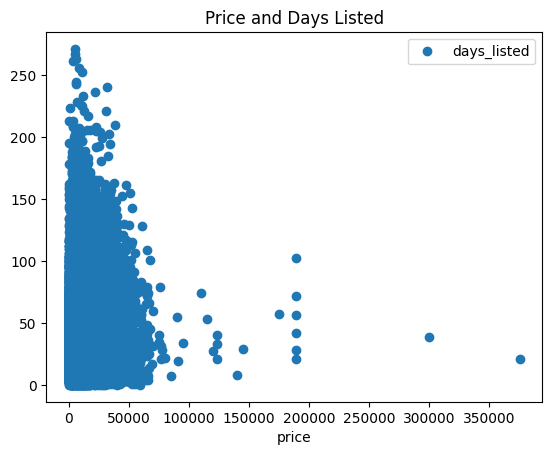

-0.0006821100678298553


In [13]:
df.plot(x='price',y='days_listed',title='Price and Days Listed', style='o')
plt.show()

print(df['price'].corr(df['days_listed']))

From the scatterplot it does show a relationship between the price of a vehicle and the days it stays listed. The larger cluster towards the left side of the chart suggests that the lower the price, the less days the vehicle was on the market.

Yet, when you look at the Correlation Coefficient it shows a negative relationship,one that is almost non-existent, this suggests that there are other factors other than price that strongly influence the duration a vehicle stays on the market.

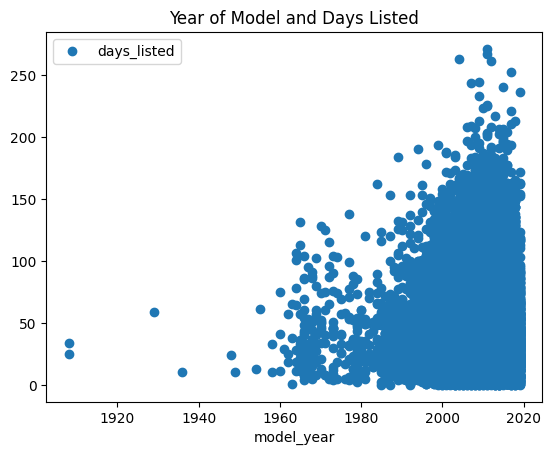

-0.0057033128838531195


In [14]:
df.plot(x='model_year',y='days_listed',title='Year of Model and Days Listed', style='o')
plt.show()

print(df['model_year'].corr(df['days_listed']))

After examining both the chart for Model Year and Days Listed on the Market, there is a stronger correlation between the model year and days listed than price and days listed. The newer the vehicle the fewer days on the market, this shows that buyers consider model year as a stronger influence for their purchase than the price.

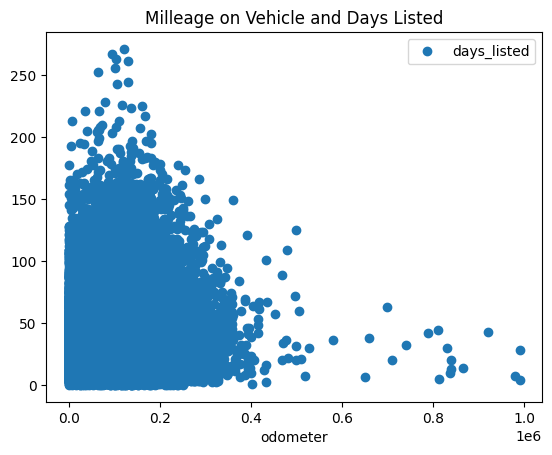

0.0038042557961884206
The smallest amount of milleage on a vehicle being sold was 0.0
The largest amount of milleage on a vehicle being sold was 990000.0


In [15]:
df.plot(x='odometer',y='days_listed',title='Milleage on Vehicle and Days Listed', style='o')
plt.show()

odometer_min = df['odometer'].min()
odometer_max = df['odometer'].max()

print(df['odometer'].corr(df['days_listed']))
print(f'The smallest amount of milleage on a vehicle being sold was {odometer_min}')
print(f'The largest amount of milleage on a vehicle being sold was {odometer_max}')

This suggests that milleage on a vehicle is a more significant factor for buyers than price or year of a vehicle. The fewer miles the more likely the vehicle will spend less days on the market.

In [16]:
# We need to find the times each type of vehicle appears in the DataFrame before we can do any sort of quantitative analysis or graphing due to the fact that the 'model' column is a str type, not a float or int type
model_count = df['model'].value_counts()
print(model_count)


# We need to add this as a new column into the existing DataFrame so that we can analyse it against other columns of data
df['model_count'] = df.groupby('model')['model'].transform('count')

# Ensure that the column was properly added and displays correct values
print(df.head())

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        NaN  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_c

In [17]:
model_stats = df.groupby('model').agg(
    listing_count=('model', 'size'),
    average_days_listed=('days_listed', 'mean')
).reset_index()

correlation = model_stats['listing_count'].corr(model_stats['average_days_listed'])
print(correlation)

-0.022303311972010832


The correlation coefficient shows that there is almost no relationship between the type of model and the days it stays listed on the market. The more pressing variable would be the milleage on the vehicle itself at this point in our analysis.

In [18]:
# We need to find the times each type of condition appears in the DataFrame before we can do any sort of quantitative analysis or graphing due to the fact that the 'model' column is a str type, not a float or int type 
cond_count = df['condition'].value_counts()
print(cond_count)

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64


condition
new          37.111888
salvage      39.008696
fair         39.118233
like new     39.166807
excellent    39.611714
good         39.631323
Name: days_listed, dtype: float64


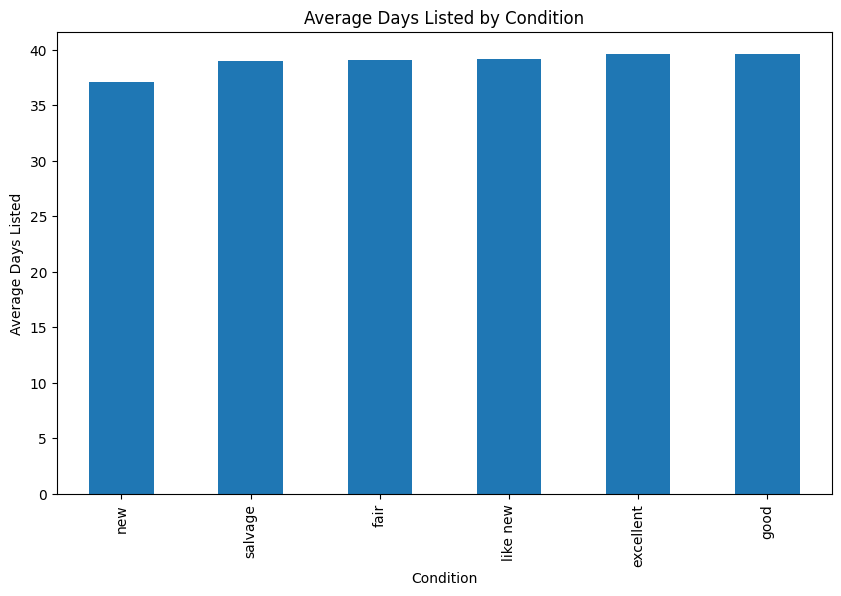

0.0057666317385060275


In [21]:
# Add to the DataFrame so we can plot it against the days listed
df['cond_count'] = df.groupby('condition')['condition'].transform('count')

# Plot to see the relationship between the condition of the vehicle and the average amount of days it spent on the market
avg_days = df.groupby('condition')['days_listed'].mean().sort_values()
print(avg_days)

avg_days.plot(kind='bar', figsize=(10,6))
plt.title('Average Days Listed by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Days Listed')
plt.show()

# Find the correlation between these two factors
print(df['cond_count'].corr(df['days_listed']))

While the graph shows that there is only a minute difference in terms of average days a vehicle (depending on the condition) stays on the market, there is a positive correlation that the better condition a car is in the faster it is to sell. The milleage of a car is still the superior factor when consumers are considering the purchase of a vehicle.